In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


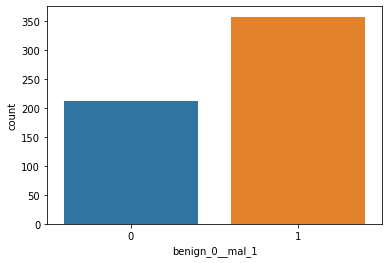

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

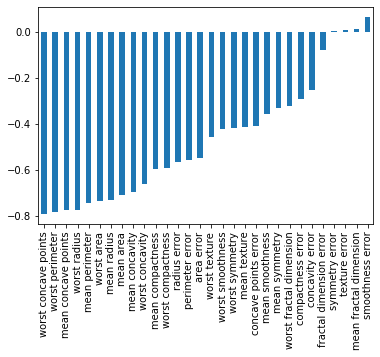

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

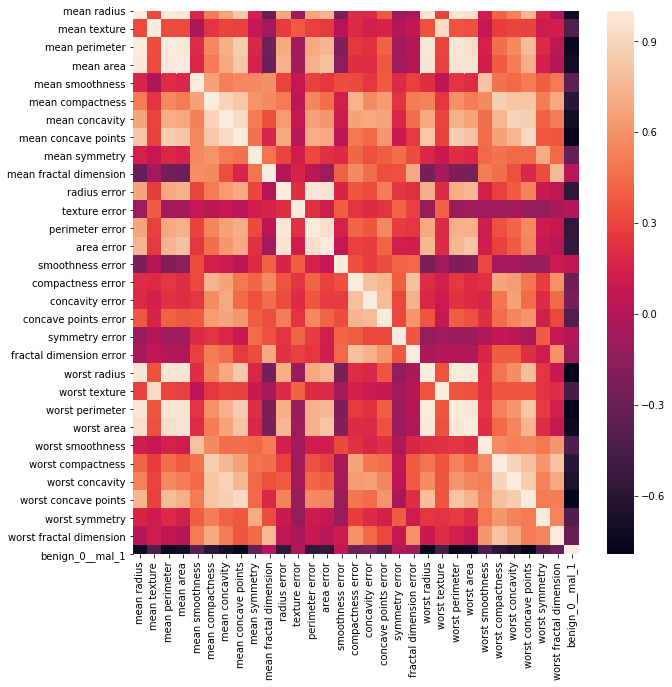

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense,Dropoutout

In [18]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 38ms/step - loss: 0.6555 - val_loss: 0.6331
Epoch 2/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6198 - val_loss: 0.5969
Epoch 3/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5800 - val_loss: 0.5563
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5369 - val_loss: 0.5121
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4921 - val_loss: 0.4658
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4464 - val_loss: 0.4177
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4021 - val_loss: 0.3712
Epoch 8/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3608 - val_loss: 0.3287
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3279 - val_loss: 0.2978
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2978 - val_loss: 0.2702
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.0541 - val_loss: 0.1094
Epoch 83/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0541 - val_loss: 0.1047
Epoch 84/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0545 - val_loss: 0.1024
Epoch 85/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0540 - val_loss: 0.1066
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0526 - val_loss: 0.1100
Epoch 87/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0512 - val_loss: 0.1015
Epoch 88/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0519 - val_loss: 0.1031
Epoch 89/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0525 - val_loss: 0.1034
Epoch 90/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0541 - val_loss: 0.1078
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0515 - val_loss: 0.1089
Epoch 9

14/14 [==============================] - 0s 8ms/step - loss: 0.0442 - val_loss: 0.1128
Epoch 164/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0417 - val_loss: 0.1324
Epoch 165/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0419 - val_loss: 0.1228
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0403 - val_loss: 0.1248
Epoch 167/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0419 - val_loss: 0.1282
Epoch 168/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0553 - val_loss: 0.1188
Epoch 169/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0503 - val_loss: 0.1184
Epoch 170/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0427 - val_loss: 0.1279
Epoch 171/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.1244
Epoch 172/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0403 - val_loss: 0.1174


Epoch 244/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0339 - val_loss: 0.1395
Epoch 245/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0369 - val_loss: 0.1196
Epoch 246/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0372 - val_loss: 0.1476
Epoch 247/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0298 - val_loss: 0.1176
Epoch 248/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0386 - val_loss: 0.1405
Epoch 249/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0340 - val_loss: 0.1311
Epoch 250/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0325 - val_loss: 0.1399
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0369 - val_loss: 0.1363
Epoch 252/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0441 - val_loss: 0.1267
Epoch 253/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0345 - 

14/14 [==============================] - 0s 13ms/step - loss: 0.0269 - val_loss: 0.1340
Epoch 325/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0293 - val_loss: 0.1359
Epoch 326/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0338 - val_loss: 0.1402
Epoch 327/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0272 - val_loss: 0.1284
Epoch 328/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0271 - val_loss: 0.1445
Epoch 329/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0290 - val_loss: 0.1411
Epoch 330/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0283 - val_loss: 0.1419
Epoch 331/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0272 - val_loss: 0.1407
Epoch 332/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0275 - val_loss: 0.1408
Epoch 333/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0336 - val_loss: 0.1

14/14 [==============================] - 0s 22ms/step - loss: 0.0215 - val_loss: 0.1537
Epoch 405/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0233 - val_loss: 0.1462
Epoch 406/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0302 - val_loss: 0.1725
Epoch 407/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0249 - val_loss: 0.1358
Epoch 408/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0242 - val_loss: 0.1551
Epoch 409/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0207 - val_loss: 0.1463
Epoch 410/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0214 - val_loss: 0.1477
Epoch 411/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0209 - val_loss: 0.1372
Epoch 412/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0249 - val_loss: 0.1509
Epoch 413/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0221 - val_loss: 0.15

Epoch 485/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0161 - val_loss: 0.1578
Epoch 486/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0160 - val_loss: 0.1417
Epoch 487/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0183 - val_loss: 0.1777
Epoch 488/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0183 - val_loss: 0.1539
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0162 - val_loss: 0.1648
Epoch 490/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0172 - val_loss: 0.1602
Epoch 491/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0160 - val_loss: 0.1511
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0176 - val_loss: 0.1739
Epoch 493/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0157 - val_loss: 0.1582
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0152 - val_

Epoch 566/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0174 - val_loss: 0.2253
Epoch 567/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0133 - val_loss: 0.1646
Epoch 568/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0184 - val_loss: 0.1995
Epoch 569/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.1828
Epoch 570/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0119 - val_loss: 0.1914
Epoch 571/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0123 - val_loss: 0.1889
Epoch 572/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0127 - val_loss: 0.2013
Epoch 573/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0121 - val_loss: 0.1608
Epoch 574/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0150 - val_loss: 0.2359
Epoch 575/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0177 - val_l

In [21]:
losses  =pd.DataFrame(model.history.history)

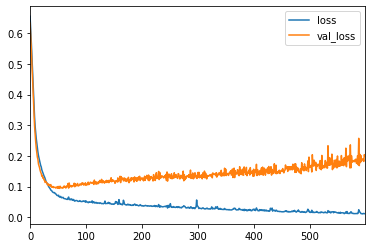

In [22]:
losses.plot()

In [23]:
#callbacks

In [29]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
#help(EarlyStopping)

In [32]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [34]:
model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6924 - val_loss: 0.6703
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6641 - val_loss: 0.6425
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6310 - val_loss: 0.6057
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5940 - val_loss: 0.5690
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5559 - val_loss: 0.5283
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5150 - val_loss: 0.4842
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4687 - val_loss: 0.4368
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4217 - val_loss: 0.3896
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3796 - val_loss: 0.3481
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3411 - val_loss: 0.3107
Epoch 

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0523 - val_loss: 0.0918
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0523 - val_loss: 0.1004
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0527 - val_loss: 0.1007
Epoch 86/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0525 - val_loss: 0.0957
Epoch 87/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0514 - val_loss: 0.0940
Epoch 88/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0510 - val_loss: 0.0962
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0509 - val_loss: 0.1020
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0522 - val_loss: 0.0982
Epoch 91/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0515 - val_loss: 0.1060
Epoch 92/600
14/14 [==============================] - 0s 22ms/step - loss: 0.0508 - val_loss: 0.

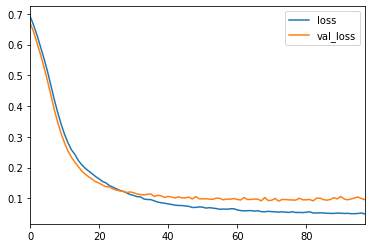

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
# Dropout Layers

In [39]:
from tensorflow.keras.layers import Dropout

In [41]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 23ms/step - loss: 0.7049 - val_loss: 0.6725
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6674 - val_loss: 0.6553
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6458 - val_loss: 0.6307
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6196 - val_loss: 0.5988
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6119 - val_loss: 0.5672
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5866 - val_loss: 0.5351
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5559 - val_loss: 0.5056
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5207 - val_loss: 0.4727
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5216 - val_loss: 0.4466
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4874 - val_loss: 0.4146
Epoch

14/14 [==============================] - 0s 15ms/step - loss: 0.1020 - val_loss: 0.1027
Epoch 83/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1148 - val_loss: 0.0956
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0920 - val_loss: 0.0985
Epoch 85/600
14/14 [==============================] - 0s 12ms/step - loss: 0.1218 - val_loss: 0.0996
Epoch 86/600
14/14 [==============================] - 0s 11ms/step - loss: 0.1064 - val_loss: 0.0972
Epoch 87/600
14/14 [==============================] - 0s 23ms/step - loss: 0.1207 - val_loss: 0.1017
Epoch 88/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0852 - val_loss: 0.0964
Epoch 89/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1166 - val_loss: 0.0915
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1038 - val_loss: 0.1018
Epoch 91/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0956 - val_loss: 0.0918
Epoch 92

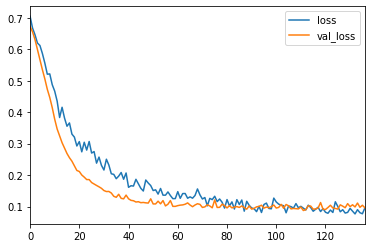

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [49]:
predictions = model.predict_classes(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [52]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
